## Python for Data Analytics


### Section 1: Data Import and Initial Exploration


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] =(10,6)
rcParams['font.size'] =12
rcParams['axes.titlesize'] =14
rcParams['axes.labelsize'] =12
rcParams['legend.fontsize'] =12
rcParams['xtick.labelsize'] =12
rcParams['ytick.labelsize'] =12
rcParams['axes.titleweight'] ='bold'


customers = pd.read_csv('Customers.csv')
products= pd.read_csv('Products.csv')
sales= pd.read_csv('Sales.csv',parse_dates=['Date'])


In [41]:
customers.head()

,Customer ID,Customer,Gender,Member Type,Region,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,G001,Zin Zin,Male,Gold,Yangon,NaN,NaN,NaN
1,S001,Khine Kyaw,Male,Silver,Mawlamyaing,NaN,NaN,NaN
2,S002,Thiri Zaw,Female,Silver,Magway,NaN,NaN,NaN
3,N001,Nay Min,Male,Normal,Magway,NaN,NaN,NaN
4,N002,Su Htet,Female,Normal,Yangon,NaN,NaN,NaN


In [42]:
customers.shape

(68, 8)

In [43]:
customers.describe()

,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [44]:
products.head()

,Product ID,Product,Brand,Category,Unit Cost,Unit Price
0,HB001,BioGlow Youth Serum,TimeCraft,Health and Beauty,20900,29500
1,HB002,TranquilSoul Sleep Mask,SerenityNest,Health and Beauty,18600,25100
2,HB003,PureVita Wellness Tea,PalettePerfect,Health and Beauty,24800,40900
3,HB004,SalonEssence Hair Dryer,GreenSmile,Health and Beauty,4800,6800
4,HB005,ZenMist Aromatherapy Diffuser,GreenThumb,Health and Beauty,5700,8700


In [45]:
products.shape

(49, 6)

In [46]:
products.describe()

,Unit Cost,Unit Price
count,49.000000,49.000000
mean,14836.734694,22034.693878
std,9286.407941,13665.826463
min,1300.000000,2200.000000
25%,5900.000000,9400.000000
50%,12300.000000,19600.000000
75%,23900.000000,32800.000000
max,30000.000000,49900.000000


In [47]:
sales.head()

,Invoice ID,Date,Customer Code,Product Code,Qty,Channel,Payment
0,750-67-8428,2020-01-05,N014,HB007,1,Store,CB
1,226-31-3081,2020-01-05,S004,FB001,2,Facebook,CB
2,631-41-3108,2020-01-05,P007,EA004,3,Website,CB
3,123-19-1176,2020-01-05,P002,FA006,2,Store,K Pay
4,373-73-7910,2020-01-05,G006,ST004,3,Store,Cash


In [48]:
sales.shape

(28946, 7)

In [49]:
sales.describe()

,Date,Qty
count,28946,28946.000000
mean,2021-12-23 03:32:28.372832,3.943792
min,2020-01-05 00:00:00,1.000000
25%,2020-12-31 00:00:00,2.000000
50%,2021-12-24 00:00:00,3.000000
75%,2022-12-24 00:00:00,5.000000
max,2023-12-06 00:00:00,14.000000
std,NaN,2.526717


### Section 2: Data Cleaning



In [51]:
def remove_duplicate(df,name):
    before = df.shape[0]
    df.drop([col for col in df.columns if col.startswith("Unnamed")],axis =1,inplace=True)
    df = df.drop_duplicates()
    after = df.shape[0]
    print(f' {name}: removed {before - after} duplicated rows.') 
    return df

customers = remove_duplicate(customers,'Customers')
products =remove_duplicate(products,'Products')
sales = remove_duplicate(sales,'Sales')

 Customers: removed 0 duplicated rows.
 Products: removed 2 duplicated rows.
 Sales: removed 9 duplicated rows.


### Section 3: Handling Missing Values 


In [53]:

customers.isnull().sum()

Customer ID    0
Customer       0
Gender         0
Member Type    4
Region         0
dtype: int64

In [54]:
products.isnull().sum()

Product ID    0
Product       0
Brand         0
Category      0
Unit Cost     0
Unit Price    0
dtype: int64

In [55]:
sales.isnull().sum()

Invoice ID        0
Date              0
Customer Code     0
Product Code      0
Qty               0
Channel          62
Payment          59
dtype: int64

In [56]:
customers['Member Type'] = customers['Member Type'].fillna('Unknown')
customers.isnull().sum()

Customer ID    0
Customer       0
Gender         0
Member Type    0
Region         0
dtype: int64

In [57]:
sales['Channel'] = sales['Channel'] .fillna('Unknown')
sales['Payment'] = sales['Payment'] .fillna('Unknown')
sales.rename(columns={'Customer Code': 'Customer ID', 'Product Code': 'Product ID'}, inplace=True)
sales.isnull().sum()

Invoice ID     0
Date           0
Customer ID    0
Product ID     0
Qty            0
Channel        0
Payment        0
dtype: int64

### Section 4: Feature Engineering


In [59]:
merge_df = sales.merge(customers,on='Customer ID',how='left')
merge_df = merge_df.merge(products,on='Product ID',how='left')
merge_df.head() 

,Invoice ID,Date,Customer ID,Product ID,Qty,Channel,Payment,Customer,Gender,Member Type,Region,Product,Brand,Category,Unit Cost,Unit Price
0,750-67-8428,2020-01-05,N014,HB007,1,Store,CB,Win Aung,Male,Normal,Magway,FitFlex Resistance Bands Set,GreenSmile,Health and Beauty,1300,2200
1,226-31-3081,2020-01-05,S004,FB001,2,Facebook,CB,Cherry Win,Female,Silver,Mandalay,PureHarvest Organic Green Tea,VelocityGamer,Food and Beverages,26200,34600
2,631-41-3108,2020-01-05,P007,EA004,3,Website,CB,Kyaw Kyaw,Male,Premium,Naypyidaw,iPowerFlex Portable Solar Charger,GreenThumb,Electronic Accessories,11300,18600
3,123-19-1176,2020-01-05,P002,FA006,2,Store,K Pay,Hnin Hnin,Female,Premium,Yangon,TrendLuxe Handcrafted Bracelet,Luminex,Fashion Accessories,11200,15100
4,373-73-7910,2020-01-05,G006,ST004,3,Store,Cash,Aye Aye,Female,Gold,Yangon,PinnaclePeak Outdoor Blanket,TimeCraft,Sports and Travel,26200,35100


In [60]:
merge_df['total sales amount'] = merge_df['Qty'] * merge_df['Unit Price']


merge_df['year'] = merge_df['Date'].dt.year
merge_df['month'] = merge_df['Date'].dt.month
merge_df['dayname'] = merge_df['Date'].dt.day_name()
merge_df['year_month'] = merge_df['Date'].dt.to_period('M')


merge_df.head()

,Invoice ID,Date,Customer ID,Product ID,Qty,Channel,Payment,Customer,Gender,Member Type,...,Product,Brand,Category,Unit Cost,Unit Price,total sales amount,year,month,dayname,year_month
0,750-67-8428,2020-01-05,N014,HB007,1,Store,CB,Win Aung,Male,Normal,...,FitFlex Resistance Bands Set,GreenSmile,Health and Beauty,1300,2200,2200,2020,1,Sunday,2020-01
1,226-31-3081,2020-01-05,S004,FB001,2,Facebook,CB,Cherry Win,Female,Silver,...,PureHarvest Organic Green Tea,VelocityGamer,Food and Beverages,26200,34600,69200,2020,1,Sunday,2020-01
2,631-41-3108,2020-01-05,P007,EA004,3,Website,CB,Kyaw Kyaw,Male,Premium,...,iPowerFlex Portable Solar Charger,GreenThumb,Electronic Accessories,11300,18600,55800,2020,1,Sunday,2020-01
3,123-19-1176,2020-01-05,P002,FA006,2,Store,K Pay,Hnin Hnin,Female,Premium,...,TrendLuxe Handcrafted Bracelet,Luminex,Fashion Accessories,11200,15100,30200,2020,1,Sunday,2020-01
4,373-73-7910,2020-01-05,G006,ST004,3,Store,Cash,Aye Aye,Female,Gold,...,PinnaclePeak Outdoor Blanket,TimeCraft,Sports and Travel,26200,35100,105300,2020,1,Sunday,2020-01


### Section 5: Exploratory Data Analysis (EDA)


In [62]:
merge_df.columns

Index(['Invoice ID', 'Date', 'Customer ID', 'Product ID', 'Qty', 'Channel',
       'Payment', 'Customer', 'Gender', 'Member Type', 'Region', 'Product',
       'Brand', 'Category', 'Unit Cost', 'Unit Price', 'total sales amount',
       'year', 'month', 'dayname', 'year_month'],
      dtype='object')

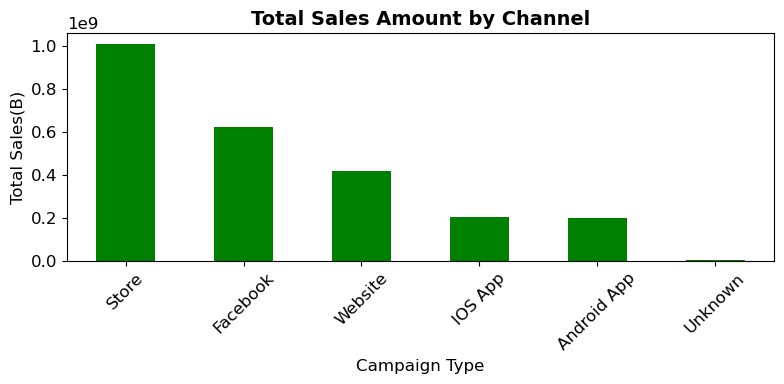

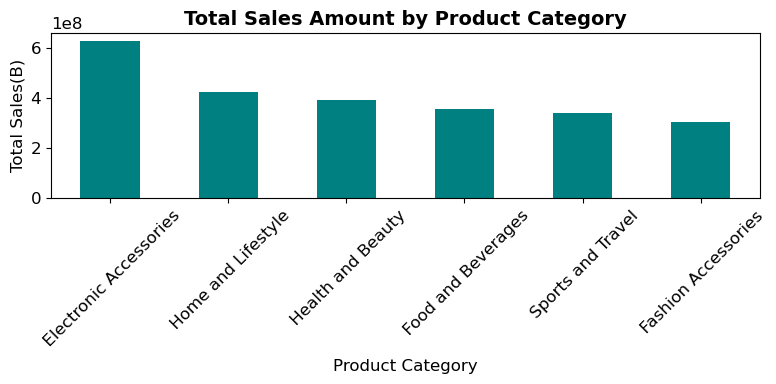

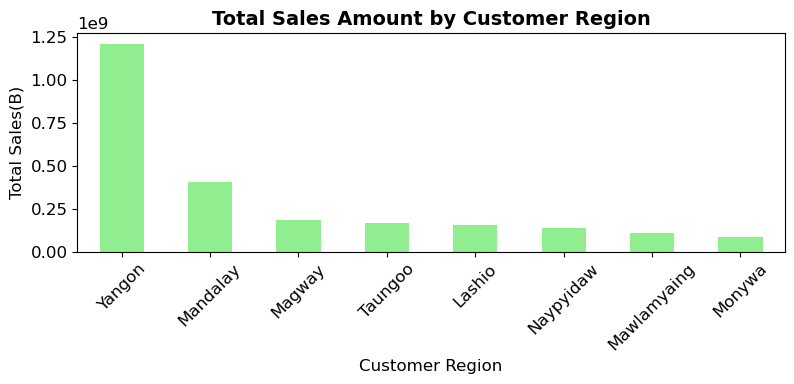

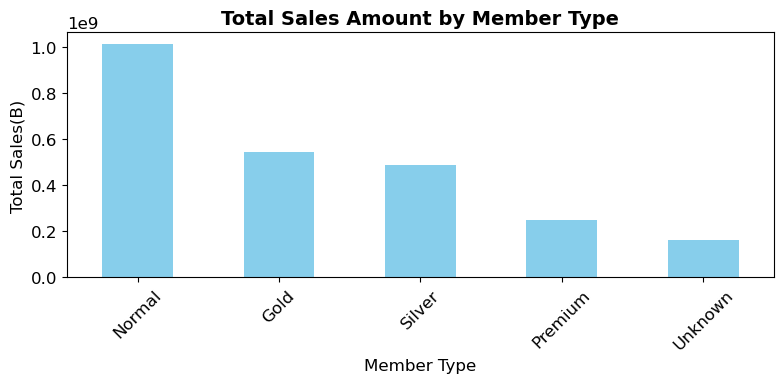

In [107]:


# sales by channel
channel_sales = merge_df.groupby('Channel')['total sales amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
channel_sales.plot(kind='bar', color='green')
plt.title('Total Sales Amount by Channel')
plt.ylabel('Total Sales(B)')
plt.xlabel('Campaign Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


# sales by product category
productcategory_sales = merge_df.groupby('Category')['total sales amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
productcategory_sales.plot(kind='bar', color='teal')
plt.title('Total Sales Amount by Product Category')
plt.ylabel('Total Sales(B)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


# sales by customer region
Region_sales = merge_df.groupby('Region')['total sales amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
Region_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales Amount by Customer Region')
plt.ylabel('Total Sales(B)')
plt.xlabel('Customer Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()


# sales by Member Type
Member_sales = merge_df.groupby('Member Type')['total sales amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
Member_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales Amount by Member Type')
plt.ylabel('Total Sales(B)')
plt.xlabel('Member Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.show()




A brief analysis of the insights :
* Store has the highest sales channel among other channels, for the other channels need to focus more in channel process and promotion to get high sales.
* Electronic Accessories are the highest selling product for customers, As the top item, we should emphasize in seasonal promotion and operation improvement.
* Yangon is also the economic city in Myanmar and customer purchase in this city has the top sales in comparing other cities. We have to take action in other cities to have more the local customer's beware and focusing in our related marketing.
* Overviewing in Member type by customer's purchase, we have to focus in customer retention program and promotion in each Member type level.


### Section 6: Time Series Analysis


In [66]:
merge_df['Date'] = pd.to_datetime(merge_df['Date'])
merge_df.set_index('Date',inplace=True)

In [67]:
merge_df.head()

,Invoice ID,Customer ID,Product ID,Qty,Channel,Payment,Customer,Gender,Member Type,Region,Product,Brand,Category,Unit Cost,Unit Price,total sales amount,year,month,dayname,year_month
Date,,,,,,,,,,,,,,,,,,,,
2020-01-05,750-67-8428,N014,HB007,1,Store,CB,Win Aung,Male,Normal,Magway,FitFlex Resistance Bands Set,GreenSmile,Health and Beauty,1300,2200,2200,2020,1,Sunday,2020-01
2020-01-05,226-31-3081,S004,FB001,2,Facebook,CB,Cherry Win,Female,Silver,Mandalay,PureHarvest Organic Green Tea,VelocityGamer,Food and Beverages,26200,34600,69200,2020,1,Sunday,2020-01
2020-01-05,631-41-3108,P007,EA004,3,Website,CB,Kyaw Kyaw,Male,Premium,Naypyidaw,iPowerFlex Portable Solar Charger,GreenThumb,Electronic Accessories,11300,18600,55800,2020,1,Sunday,2020-01
2020-01-05,123-19-1176,P002,FA006,2,Store,K Pay,Hnin Hnin,Female,Premium,Yangon,TrendLuxe Handcrafted Bracelet,Luminex,Fashion Accessories,11200,15100,30200,2020,1,Sunday,2020-01
2020-01-05,373-73-7910,G006,ST004,3,Store,Cash,Aye Aye,Female,Gold,Yangon,PinnaclePeak Outdoor Blanket,TimeCraft,Sports and Travel,26200,35100,105300,2020,1,Sunday,2020-01


C:\Users\USER\AppData\Local\Temp\ipykernel_1900\2812195246.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sale = merge_df['total sales amount'].resample('M').sum()


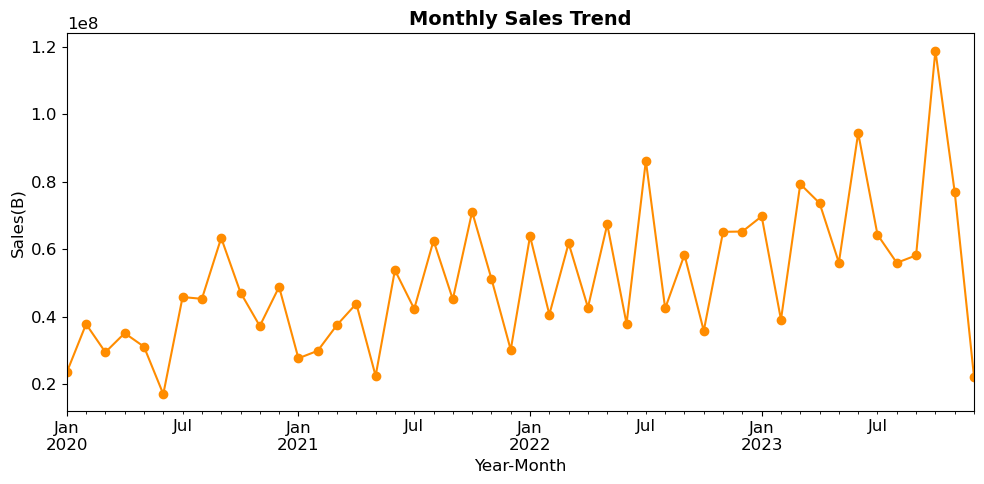

In [68]:
monthly_sale = merge_df['total sales amount'].resample('M').sum()
plt.figure(figsize=(10,5))
monthly_sale.plot(marker='o',color='darkorange')
plt.title('Monthly Sales Trend')
plt.ylabel('Sales(B)')
plt.xlabel('Year-Month')
plt.grid(False)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1900\1007720193.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sale = merge_df['total sales amount'].resample('Y').sum()


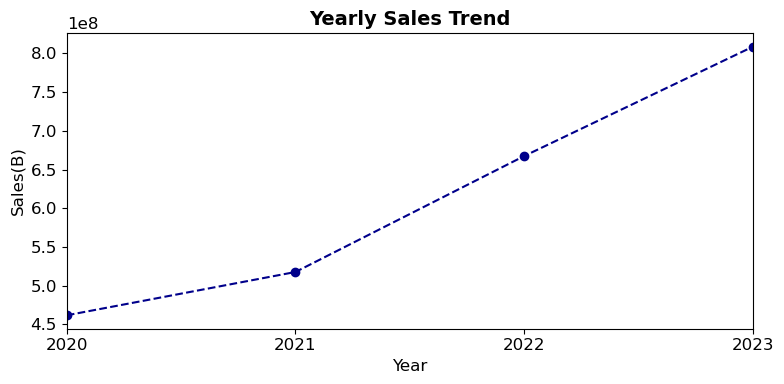

In [69]:
yearly_sale = merge_df['total sales amount'].resample('Y').sum()
plt.figure(figsize=(8,4))
yearly_sale.plot(marker='o',color='darkblue',linestyle='--')
plt.title('Yearly Sales Trend')
plt.ylabel('Sales(B)')
plt.xlabel('Year')
plt.grid(False)
plt.tight_layout()
plt.show()

In [70]:
sales_analysis = pd.DataFrame({
    'monthly sale': monthly_sale,
    'last year monthly sales': monthly_sale.shift(12)})


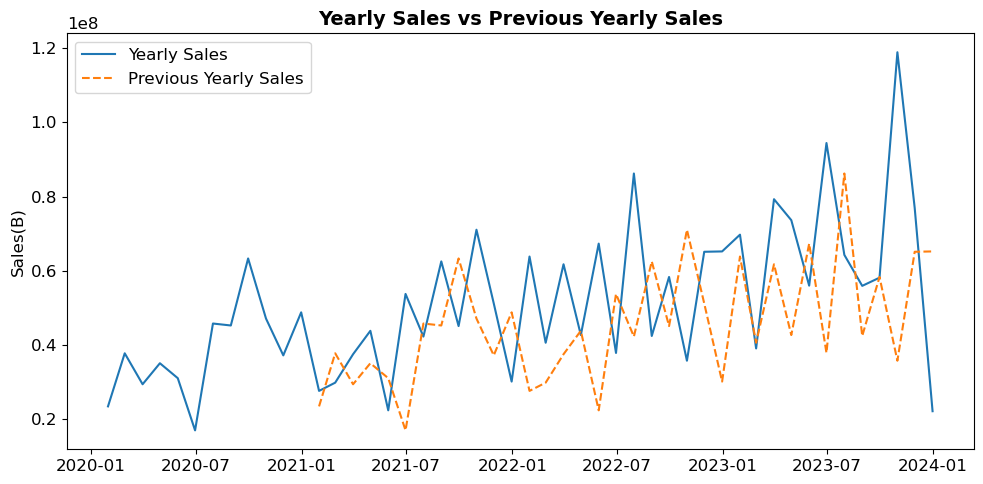

In [71]:
plt.figure(figsize=(10,5))
plt.plot(sales_analysis['monthly sale'],label='Yearly Sales')
plt.plot(sales_analysis['last year monthly sales'],label='Previous Yearly Sales',linestyle='--')
plt.ylabel('Sales(B)')
plt.legend()
plt.title('Yearly Sales vs Previous Yearly Sales')
plt.grid(False)
plt.tight_layout()
plt.show()

### Section 7: Dashboard Creation


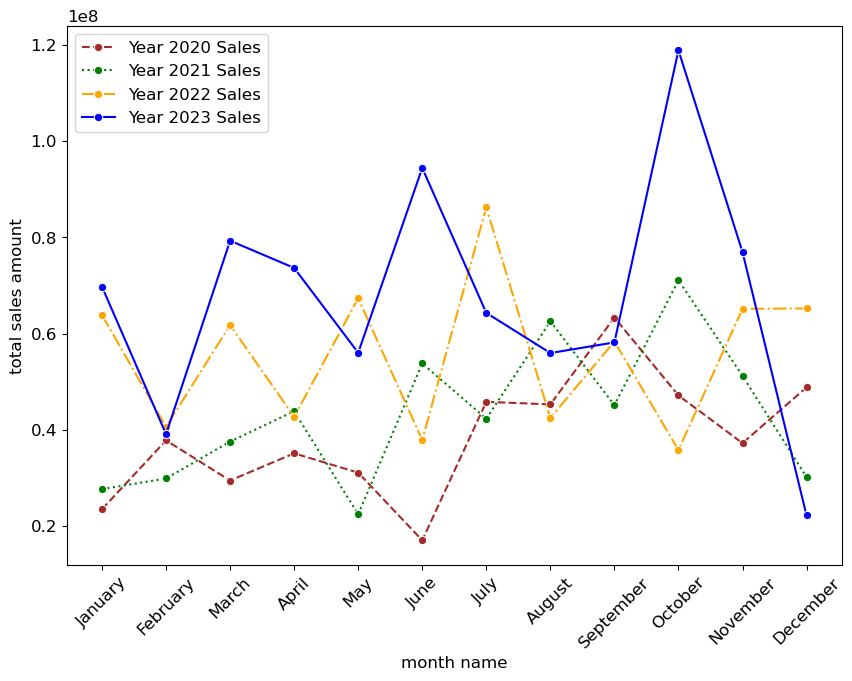

In [73]:
import calendar
merge_df['month name'] = merge_df.index.month_name()
monthly_sales = merge_df.groupby(['year','month name'])['total sales amount'].sum().reset_index()
monthly_sales.set_index('month name',inplace=True)

monthly_sales_2020 = monthly_sales[monthly_sales['year'] ==2020]
month_order = list(calendar.month_name)[1:] 
monthly_sales_2020 = monthly_sales_2020.reindex(month_order)


monthly_sales_2021 = monthly_sales[monthly_sales['year'] ==2021]
month_order = list(calendar.month_name)[1:] 
monthly_sales_2021 = monthly_sales_2021.reindex(month_order)


monthly_sales_2022 = monthly_sales[monthly_sales['year'] ==2022]
month_order = list(calendar.month_name)[1:] 
monthly_sales_2022 = monthly_sales_2022.reindex(month_order)


monthly_sales_2023 = monthly_sales[monthly_sales['year'] ==2023]
month_order = list(calendar.month_name)[1:] 
monthly_sales_2023 = monthly_sales_2023.reindex(month_order)


plt.figure(figsize=(10,7))
sns.lineplot(x=monthly_sales_2020.index, y= monthly_sales_2020['total sales amount'], color = 'brown',linestyle='--',marker='o',label='Year 2020 Sales')
sns.lineplot(x=monthly_sales_2021.index, y= monthly_sales_2021['total sales amount'], color= 'green',linestyle=':',marker='o',label='Year 2021 Sales')
sns.lineplot(x=monthly_sales_2022.index, y= monthly_sales_2022['total sales amount'], color= 'orange',linestyle='-.',marker='o',label='Year 2022 Sales')
sns.lineplot(x=monthly_sales_2023.index, y= monthly_sales_2023['total sales amount'], color= 'blue',linestyle='-',marker='o',label='Year 2023 Sales')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

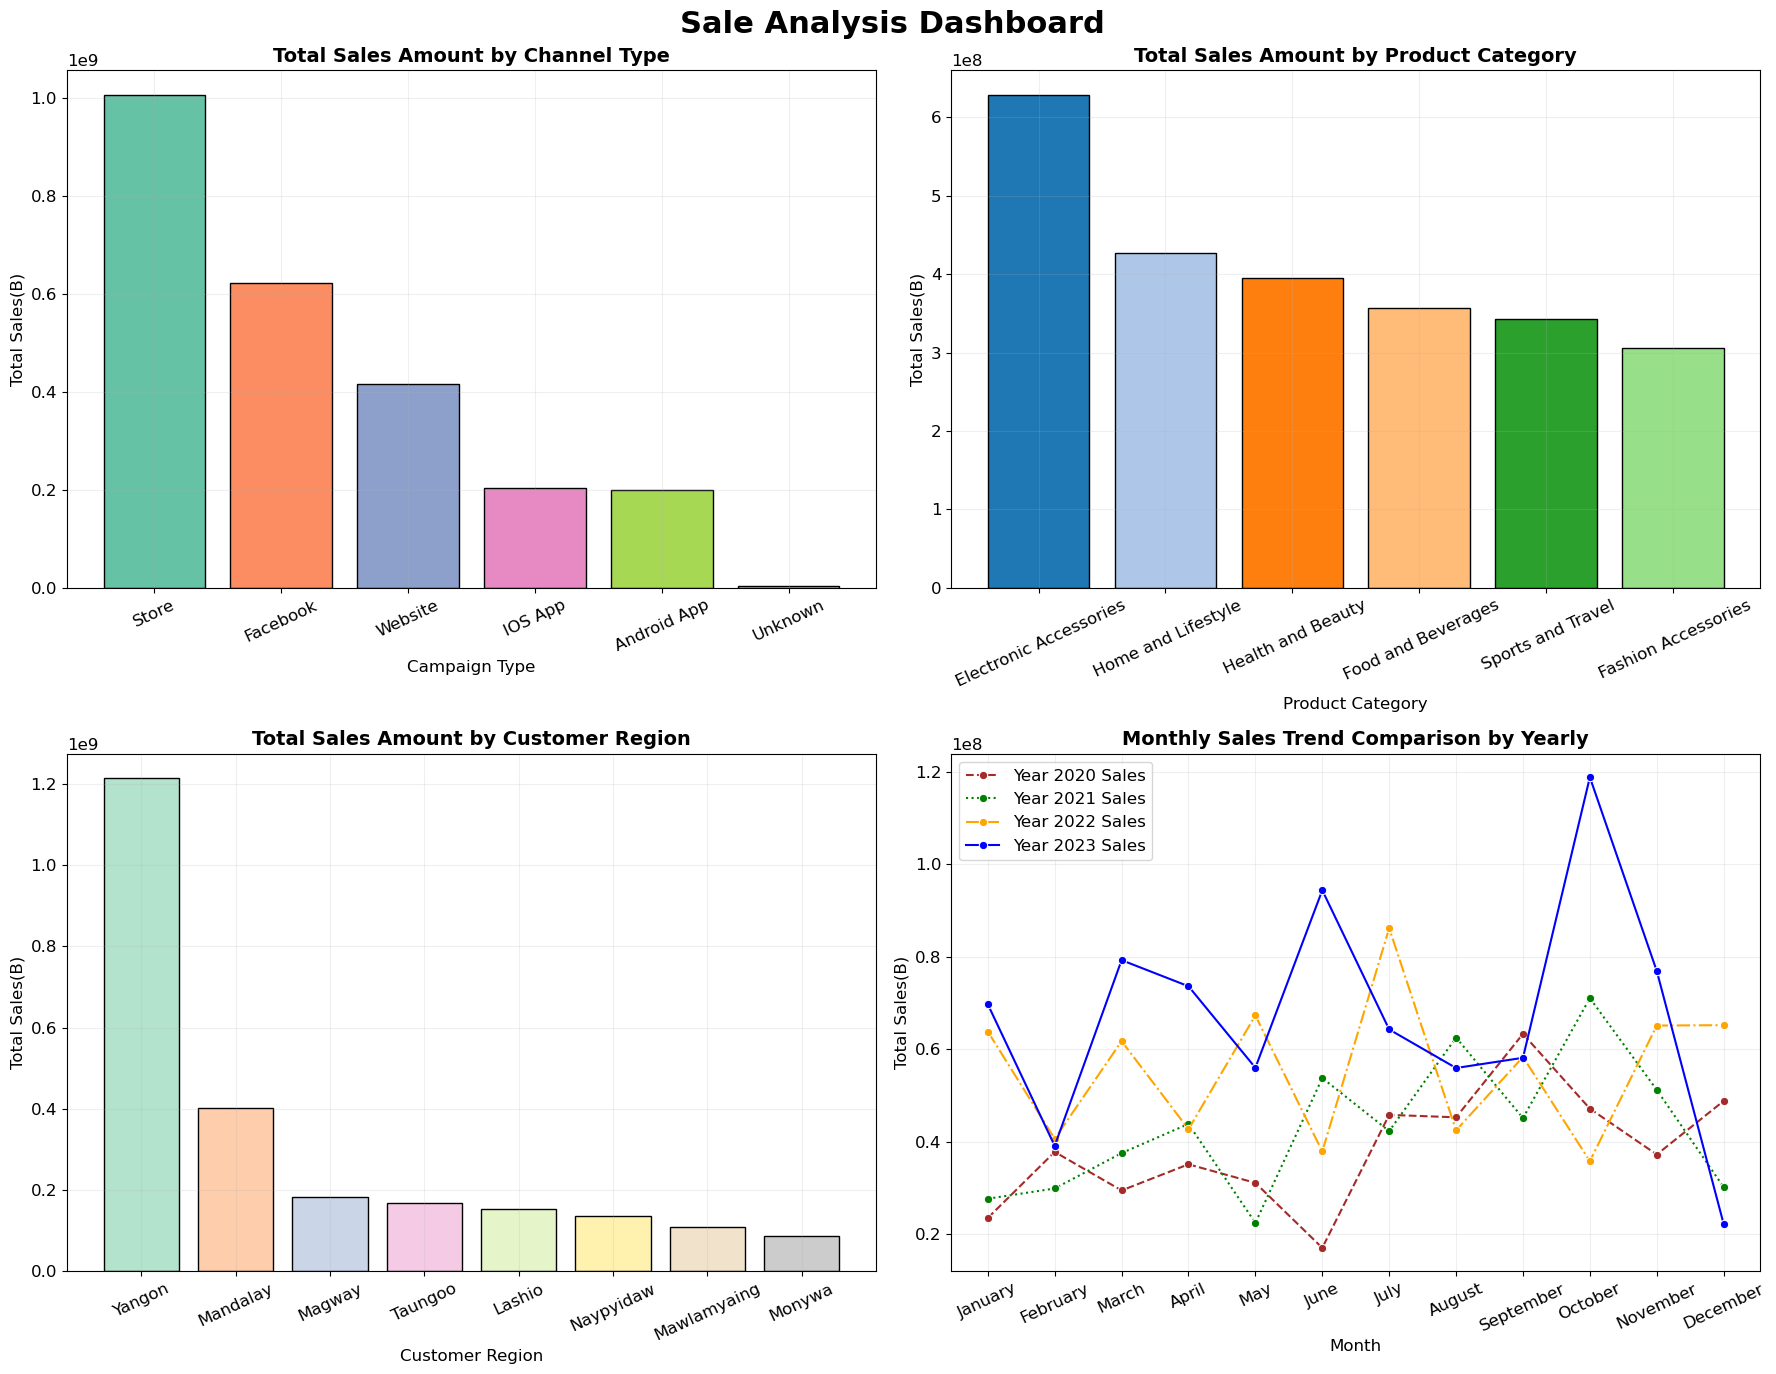

In [74]:

fig , ax = plt.subplots(2,2,figsize=(18,14)) 

# sales by channel
channel_sales = merge_df.groupby('Channel')['total sales amount'].sum().sort_values(ascending=False)
ax[0,0].bar(channel_sales.index,channel_sales.values,
       color=sns.color_palette('Set2'),edgecolor='black')
ax[0,0].set_title('Total Sales Amount by Channel Type')
ax[0,0].set_xlabel('Campaign Type')
ax[0,0].set_ylabel('Total Sales(B)')
ax[0,0].tick_params(axis='x', rotation=25)
ax[0,0].grid(alpha=0.2)



# sales by product category
productcategory_sales = merge_df.groupby('Category')['total sales amount'].sum().sort_values(ascending=False)
ax[0,1].bar(productcategory_sales.index,productcategory_sales.values,
       color=sns.color_palette('tab20'),edgecolor='black')
ax[0,1].set_title('Total Sales Amount by Product Category')
ax[0,1].set_xlabel('Product Category')
ax[0,1].set_ylabel('Total Sales(B)')
ax[0,1].tick_params(axis='x', rotation=25)
ax[0,1].grid(alpha=0.2)




# sales by customer region
Region_sales = merge_df.groupby('Region')['total sales amount'].sum().sort_values(ascending=False)
ax[1,0].bar(Region_sales.index,Region_sales .values,
       color=sns.color_palette('Pastel2'),edgecolor='black')
ax[1,0].set_title('Total Sales Amount by Customer Region')
ax[1,0].set_xlabel('Customer Region')
ax[1,0].set_ylabel('Total Sales(B)')
ax[1,0].tick_params(axis='x', rotation=25)
ax[1,0].grid(alpha=0.2)




# monthly sales trend comparison
sns.lineplot(x=monthly_sales_2020.index, y= monthly_sales_2020['total sales amount'], color = 'brown',linestyle='--',marker='o',label='Year 2020 Sales')
sns.lineplot(x=monthly_sales_2021.index, y= monthly_sales_2021['total sales amount'], color= 'green',linestyle=':',marker='o',label='Year 2021 Sales')
sns.lineplot(x=monthly_sales_2022.index, y= monthly_sales_2022['total sales amount'], color= 'orange',linestyle='-.',marker='o',label='Year 2022 Sales')
sns.lineplot(x=monthly_sales_2023.index, y= monthly_sales_2023['total sales amount'], color= 'blue',linestyle='-',marker='o',label='Year 2023 Sales')
ax[1,1].set_title('Monthly Sales Trend Comparison by Yearly')
ax[1,1].set_xlabel('Month')
ax[1,1].set_ylabel('Total Sales(B)')
ax[1,1].tick_params(axis='x', rotation=25)
ax[1,1].grid(alpha=0.2)


fig.suptitle('Sale Analysis Dashboard', fontsize = 22, fontweight = 'bold')
plt.tight_layout()

In [75]:
fig.savefig('SaleAnalysis.jpg')